# ***Auxiliar functions***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Donutplot:
    def __init__(self, sizes, colors, circle_ratio):
        self.colors = colors
        self.sizes = sizes
        self.circle_ratio = circle_ratio
        # self.labels = labels
    def plot(self):
        plt.pie(self.sizes, colors = self.colors,radius = 1.1,
                wedgeprops = {'linewidth': 1, 'edgecolor': 'white'},
                autopct='%1.1f%%',textprops = dict(color = "w",size = 10,weight = 'bold'))
        my_circle = plt.Circle((0, 0), self.circle_ratio, color = 'white')
        p = plt.gcf()
        p.gca().add_artist(my_circle)

if __name__ == '__main__':
    df = pd.read_csv(r'/Users/diego/Documents/UNIOVI/TFG/DATA/Breast_cancer.csv')
    n_benign = sum(df.diagnosis == 'B')  # Número de nódulos benignos
    n_malign = sum(df.diagnosis == 'M')  # Número de nódulos benignos
    color = {"granate": "#BA4A00",
             "amarillo": "#F5B041",
             "verde": "#148F77",
             "blue": "#0051A2",
             "red": "#DD1717"}
    size = [n_benign,n_malign]
    labs =  np.around([100*n_benign/sum(size),100*n_malign/sum(size)],2)
    d = Donutplot(sizes=size, colors=(color["blue"], color["red"]), circle_ratio=0.4)
    d.plot()
    plt.legend(['Benigno', 'Maligno'], title='Tipo de nódulo', bbox_to_anchor=(0.95, 1))
    # plt.savefig('/Users/diego/Documents/UNIOVI/TFG/LATEX/Media/proporcion.jpg', dpi = 500)

    plt.show()

# **1 - *Description of the Dataset***

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import pearsonr
from utils.Plots import Donutplot
# import dataframe_image as df___i

color = {"granate":"#BA4A00",
         "amarillo":"#F5B041",
         "verde":"#148F77",
         "blue":"#0051A2",
         "red": "#DD1717"}
color_palette = [color["blue"], 'darkorchid', color['verde'], color['amarillo'],'gray', 'cornflowerblue', color['red']]

sb.set_style('white')

### **1.1 - Loading the dataset**

In [3]:
df = pd.read_csv('Data/Dry_Bean_Dataset.csv')


In [4]:
columns = df.columns.values
X = df.drop(columns='Class').values
y = df['Class']
classes = y.unique()

print('· NUMBER OF FEATURES:', X.shape[1])
print('\n· FEATURES:', columns[:-1])
print('\n· NUMBER OF DATA POINTS:', X.shape[0])
print('\n· CLASSES:', classes)
print('\n· NUMBER OF CLASSES:', len(classes))


· NUMBER OF FEATURES: 16

· FEATURES: ['Area' 'Perimeter' 'MajorAxisLength' 'MinorAxisLength' 'AspectRation'
 'Eccentricity' 'ConvexArea' 'EquivDiameter' 'Extent' 'Solidity'
 'roundness' 'Compactness' 'ShapeFactor1' 'ShapeFactor2' 'ShapeFactor3'
 'ShapeFactor4']

· NUMBER OF DATA POINTS: 13611

· CLASSES: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']

· NUMBER OF CLASSES: 7


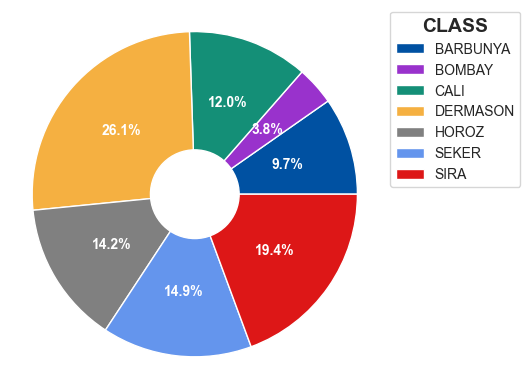

In [5]:
size = np.unique(y, return_counts=True)[1].tolist()
names = np.unique(y, return_counts=True)[0].tolist()
d = Donutplot(sizes = size ,colors = (color_palette),
circle_ratio = 0.3)
d.plot()
plt.legend(names ,loc = 'lower right', title = 'CLASS', bbox_to_anchor=(1.4, 0.5), title_fontproperties = {'weight': 'bold', 'size': 14}, prop = {'family': 'Arial'});
plt.savefig(f'Figures/donut.jpg', dpi = 500,bbox_inches='tight')

#  **2 - *Detailed explanation of the attributes of the data***

## Standarization

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Standarization of the dataset
sc = StandardScaler()
X_stdz = sc.fit_transform(X)
df_stdz = pd.DataFrame(columns = columns[:-1], data = X_stdz)
df_stdz['Class'] = df.Class

In [ ]:
# ax.set_title(f'Variables de tipo {tipos[i]}',fontsize = 20)

# **3 - *Data visualization(s) based on suitable ...***

### ***1. Outliers***

In [ ]:
Threshold_ = 3
outlier_index = []
df_empty = pd.DataFrame(columns=df.columns)
index = 0
for K in classes:
    outlier_index = []
    a = df.loc[df["Class"] == K]
    value = a.drop(columns='Class').values
    for j in range(16):
        std = np.std(value[:, j])
        mean = np.mean(value[:, j])
        for i in range(value[:, j].shape[0]):
            if (value[i, j] - mean) / std > Threshold_:
                outlier_index.append(i + index)
    index = i + index + 1
    outlier_index = np.unique(outlier_index)
    a = a.drop(outlier_index)
    df_empty = pd.concat([df_empty,a])
df_empty.reset_index(drop=True, inplace=True)
print(f'Filtered outliers: {df.shape[0] - df_empty.shape[0]}')

In [ ]:
df_empty

### ***2. Normality***

In [ ]:
from scipy.stats import shapiro
from matplotlib.offsetbox import AnchoredText

#### ***2.1 Transformations***

In [ ]:
# df_ = df_empty
from copy import deepcopy
df_ = deepcopy(df)

In [ ]:
# for col in df_.drop(columns = ['Class']).columns:
#     df_[f'{str(col)}_log'] = np.log(df_[str(col)])
df_['Solidity_sqrt'] = (max(df_['Solidity'])+ 1e-10 - df_['Solidity'])**(1/3)
df_['ShapeFactor4_sqrt'] = (max(df_['ShapeFactor4'])+ 1e-10 - df_['ShapeFactor4'])**(1/3)

In [ ]:
palette = sb.color_palette(n_colors=df_.shape[1])
n = df_.shape[1]

#### ***2.2 Normality Plots***

In [ ]:
fig, ax = plt.subplots(nrows = n//2 , ncols = 2,figsize = (30,40))
sb.set_style('ticks')
save = True
for i, name, ax in zip(np.arange(n), df_.drop(columns=['Class']).columns, ax.ravel()):
    a = sb.histplot(df_[name], kde=True, ax = ax, color=palette[i]);
    # x = max(df_[name]) - max(df_[name])/80
    # y = 800
    # text = f'P-value = {np.round(shapiro(df_[name]).pvalue, 2)}';
    # anchored_text = AnchoredText(text, loc=1, prop=dict(size=12))
    # ax.add_artist(anchored_text)
    a.set_xlabel(f'{name}', fontsize=15);
if save:
    fig.savefig(r'C:\Users\Diego\Documents\DTU\IntroML\Project1_ML\Figures\Histograms.jpg', dpi = 500,bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(nrows = n//2  , ncols = 2,figsize = (30,40))
save = True
sb.set_style('ticks')
for i, name, ax in zip(np.arange(n), df_.drop(columns=['Class']).columns, ax.ravel()):
    stats.probplot(df_[name], dist="norm", plot=ax)
    ax.set_xlabel(xlabel = '')
    ax.set_title(f'{name}', size = 13)
if save:
    fig.savefig(r'C:\Users\Diego\Documents\DTU\IntroML\Project1_ML\Figures\qqplots.jpg', dpi = 500,bbox_inches='tight')


### ***3. Correlation***

In [ ]:
import seaborn as sb

In [ ]:
sb.set_context("paper", rc={"axes.labelsize": 25})
p = sb.pairplot(df,hue = 'Class',corner = True,
            height = 1.7,aspect = 1.2,plot_kws = dict(alpha =  0.6))
plt.setp(p._legend.get_title(), fontsize=30)
plt.setp(p._legend.get_texts(), fontsize=20)
save = True
for ax in p.axes.flat:
    if ax == None:
        continue
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
if save:
    p.savefig(r'C:\Users\Diego\Documents\DTU\IntroML\Project1_ML\Figures\Pairplot.jpg', dpi = 500, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(12,12))
c_plot = sb.heatmap(df_.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)
plt.savefig(r'C:\Users\Diego\Documents\DTU\IntroML\Project1_ML\Figures\corr_plot.jpg', dpi = 500, bbox_inches='tight')

### ***4. Feasibility of the ML models***

In [8]:
sb.set_style("ticks")

variable_names = []
data_melt = df_.melt(id_vars = 'Class',var_name = 'feature',value_name = 'value') # se transforma el dataset
# para el plot

fig, ax = plt.subplots(nrows = len(df_.drop(columns = ['Class']).columns)//2 , ncols = 2, figsize = (15,30))
i = 0
for feat, ax in zip(df_.drop(columns = ['Class']), ax.ravel()):
    data = data_melt[data_melt['feature'] == feat]
    sb.boxplot(x = "feature", y = "value", hue = "Class", data = data, ax = ax, palette=color_palette) # , palette = {'Maligno': color["red"],'Benigno': color["blue"]})
    if i == 0:
        ax.legend(loc = 'best', fontsize = 8)
    else:
        ax.get_legend().remove()
    i += 1
fig.savefig(f'Figures/boxplots.jpg', dpi = 500,bbox_inches='tight')

NameError: name 'df_' is not defined

# 1. Load dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show
import toolbox_02450

In [ ]:
pwd

In [ ]:
file_dir = 'Data/Dry_Bean_Dataset.csv'
df = pd.read_csv(file_dir)
raw_data = df.values
# print(raw_data.shape)

cols = range(0,16)
X = raw_data[:, cols]
# print(X.shape)
attributeNames = np.asarray(df.columns[cols])
# print(attributeNames)
classLabels = raw_data[:,-1]
classNames = np.unique(classLabels)

# print(classNames)
classDict = dict(zip(classNames,range(len(classNames))))
y = np.array([classDict[cl] for cl in classLabels])

N, M = X.shape
C = len(classNames)
x = np.empty((N,M))
for i in range(len(X)):
    for j in range(len(X[i])):
        x[i, j] = float(X[i, j])
X = x

In [ ]:
raw_data

# 2 PCA

## 2.1 PCA on dataset

### 2.1.2

In [ ]:
# Data attributes to be plotted
i = 0
j = 1

##
# Make a simple plot of the i'th attribute against the j'th attribute
# Notice that X is of matrix type (but it will also work with a numpy array)
# X = np.array(X) #Try to uncomment this line
plot(X[:, i], X[:, j], 'o')

# %%
# Make another more fancy plot that includes legend, class labels, 
# attribute names, and a title.
f = figure()
title('DryBeanDataset data')

for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(X[class_mask,i], X[class_mask,j], 'o',alpha=.3)

legend(classNames)
xlabel(attributeNames[i])
ylabel(attributeNames[j])

# Output result to screen
show()

### 2.1.3 Compute PCA

PCA computing method: \
subtracting the mean of the data: $Y=X-1\mu$($\mu$ is a vector which contains all the mean value of each attribute.) \
Then calculate the single value decomposition(SVD): $Y = USV^T$. \
Find out how much of the variation in the data each PCA component accounts for. \
$$
\rho_m = \frac{s_mm^2}{\sum_{m'=1}^Ms_{m',m'}^2}
$$

In [ ]:
# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)
# PCA by computing SVD of Y

U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

### 2.1.4

In [ ]:
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T    

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title('NanoNose data: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()

In [ ]:
Z[:,:3].shape

### 2.1.5

In [ ]:
Y = X - np.ones((N,1))*X.mean(0)
U,S,Vh = svd(Y,full_matrices=False)
V=Vh.T
N,M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,M+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('NanoNose: PCA Component Coefficients')
plt.show()

# Inspecting the plot, we see that the 2nd principal component has large
# (in magnitude) coefficients for attributes A, E and H. We can confirm
# this by looking at it's numerical values directly, too:
print('PC2:')
print(V[:,1].T)

# How does this translate to the actual data and its projections?
# Looking at the data for water:

# Projection of water class onto the 2nd principal component.
all_water_data = Y[y==4,:]

print('First water observation')
print(all_water_data[0,:])

# Based on the coefficients and the attribute values for the observation
# displayed, would you expect the projection onto PC2 to be positive or
# negative - why? Consider *both* the magnitude and sign of *both* the
# coefficient and the attribute!

# You can determine the projection by (remove comments):
print('...and its projection onto PC2')
print(all_water_data[0,:]@V[:,1])


In [ ]:
columns

In [ ]:
V[1]

### 2.1.6 Standardization

Standardization a dataset by ensuring each attribute has a mean of zero and a variance of one. (zero mean and unit variance) 

In [ ]:


r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X,0))
plt.xticks(r, attributeNames)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('NanoNose: attribute standard deviations')

## Investigate how standardization affects PCA

# Try this *later* (for last), and explain the effect
#X_s = X.copy() # Make a to be "scaled" version of X
#X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?


# Subtract the mean from the data
Y1 = X - np.ones((N, 1))*X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions 
# of Y2

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ['Zero-mean', 'Zero-mean and unit variance']
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.4)
plt.title('NanoNose: Effect of standardization')
nrows=3
ncols=2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U,S,Vh = svd(Ys[k],full_matrices=False)
    V=Vh.T # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k==1: V = -V; U = -U; 
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S;
    
    # Plot projection
    plt.subplot(nrows, ncols, 1+k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], '.', alpha=.5)
    plt.xlabel('PC'+str(i+1))
    plt.xlabel('PC'+str(j+1))
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(classNames)
    plt.axis('equal')
    
    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols,  3+k)
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], attributeNames[att])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
    # Add a unit circle
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
            
    # Plot cumulative variance explained
    plt.subplot(nrows, ncols,  5+k);
    plt.plot(range(1,len(rho)+1),rho,'x-')
    plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
    plt.plot([1,len(rho)],[threshold, threshold],'k--')
    plt.title('Variance explained by principal components');
    plt.xlabel('Principal component');
    plt.ylabel('Variance explained');
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance explained')

plt.show()
        
         

In [ ]:
matrix = np.empty((Y.shape[1], Y.shape[1]))
for i in range(Y.shape[1]):
    for j in range(Y.shape[1]):
        matrix[i, j] = np.corrcoef(Y2[:, i], Y2[:, j])[1, 0]
print(matrix)

In [ ]:
%%python nbconvert - to script Project1.ipynb